<a href="https://colab.research.google.com/github/NaveenkumarMD/Machine-learning-lab/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/profitable.csv")
df

,price,maintenance,capacity,airbag,play
0,low,low,2,no,yes
1,low,med,4,yes,no
2,low,low,4,no,yes
3,low,high,4,no,no
4,med,med,4,no,no
5,med,med,4,yes,yes
6,med,high,2,yes,no
7,med,high,5,no,yes
8,high,med,4,yes,yes
9,high,high,2,yes,no


In [ ]:
df['price'].replace(['low', 'med', 'high'],[0, 1, 2], inplace=True)
df['maintenance'].replace(['low', 'med', 'high'],[0, 1, 2], inplace=True)
df['airbag'].replace(['no', 'yes'],[0, 1], inplace=True)
df['play'].replace(['no', 'yes'],[0, 1], inplace=True)
df

,price,maintenance,capacity,airbag,play
0,0,0,2,0,1
1,0,1,4,1,0
2,0,0,4,0,1
3,0,2,4,0,0
4,1,1,4,0,0
5,1,1,4,1,1
6,1,2,2,1,0
7,1,2,5,0,1
8,2,1,4,1,1
9,2,2,2,1,0


In [ ]:
import numpy as np
import math
def calc_entropy(column):
    counts=np.bincount(column) 
    probability=counts/(len(column))
    entropy=0
    for prob in probability: 
        if prob >0:
            entropy += prob * math.log(prob, 2) 
    return -entropy

In [ ]:
def InfoGain(data,split_attribute_name,target_name="play"):
  
    total_entropy = calc_entropy(data[target_name])
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*calc_entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

In [ ]:
print(InfoGain(df,"price"))
print(InfoGain(df,"maintenance"))
print(InfoGain(df,"capacity"))
print(InfoGain(df,"airbag"))

0.016313165825732057
0.18905266854301617
0.19813134764391394
0.00723448672483451


In [ ]:
def information_gain(data, split,target):
    original_entropy=calc_entropy(data[target])
    values=data[split].unique()
    left_split=data[data[split]==values[0]]
    right_split=data[data[split]==values[1]]
    subract=0
    for subset in [left_split,right_split]:
        prob=(subset.shape[0])/data.shape[0]
        subract += prob * calc_entropy(subset[target])
    return  original_entropy - subract

In [ ]:
X = df.iloc[:,0:4]
X

,price,maintenance,capacity,airbag
0,0,0,2,0
1,0,1,4,1
2,0,0,4,0
3,0,2,4,0
4,1,1,4,0
5,1,1,4,1
6,1,2,2,1
7,1,2,5,0
8,2,1,4,1
9,2,2,2,1


In [ ]:
y = df.iloc[:,-1]
y

0     1
1     0
2     1
3     0
4     0
5     1
6     0
7     1
8     1
9     0
10    1
Name: play, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree = DecisionTreeClassifier(criterion = "entropy")
model=dtree.fit(X,y)

In [ ]:
print(calc_entropy(y))
print(calc_entropy(df["price"]))
print(calc_entropy(df["maintenance"]))
print(calc_entropy(df["capacity"]))
print(calc_entropy(df["airbag"]))

0.9940302114769565
1.5726236638951638
1.4949188482339508
1.4353713907745331
0.9940302114769565


In [ ]:
print(information_gain(df,"price","play"))
print(information_gain(df,"maintenance","play"))
print(information_gain(df,"capacity","play"))
print(information_gain(df,"airbag","play"))

0.2667574842042292
0.6303938478405928
0.19813134764391394
0.00723448672483451


In [ ]:
print(tree.export_text(dtree))

|--- feature_2 <= 4.50
|   |--- feature_1 <= 1.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |--- class: 1
|   |--- feature_1 >  1.50
|   |   |--- class: 0
|--- feature_2 >  4.50
|   |--- class: 1



In [ ]:
feature=[df["price"].name,df["maintenance"].name,df["capacity"].name,df["airbag"].name]
y=y.astype(str)

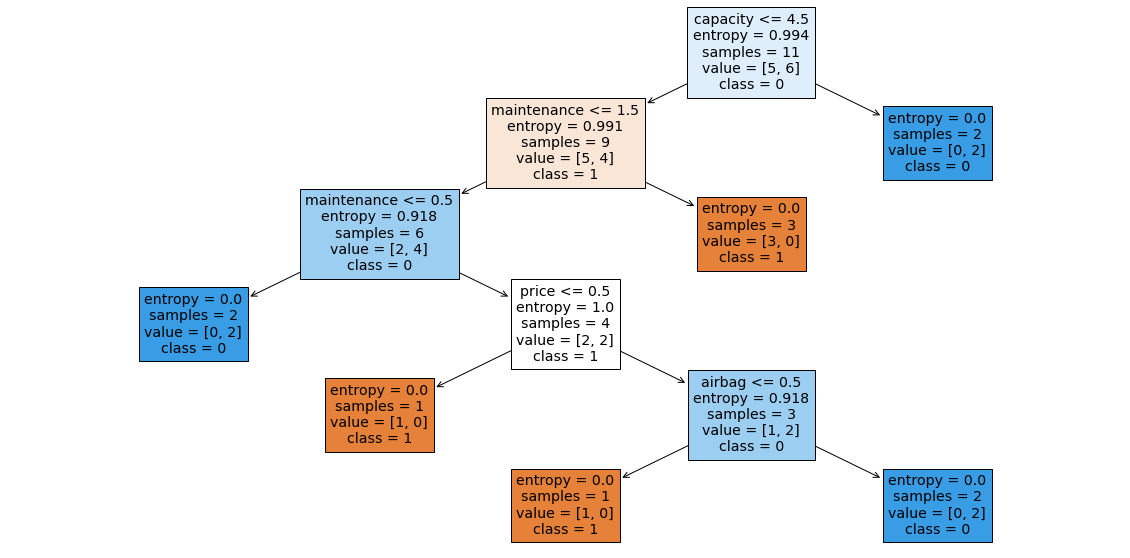

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20,10))
_=tree.plot_tree(dtree,feature_names=feature,class_names=y,filled=True)